In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\ELCOT\Documents\Machine learning\Regression\Advsales.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df_new=df.drop('Unnamed: 0',axis=1)

In [4]:
df_new.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df_new.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
X=df_new.iloc[:,:-1].values
y=df_new.iloc[:,-1].values.reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [9]:
df_new.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

Text(0.5, 1.0, 'Tv versus Sales')

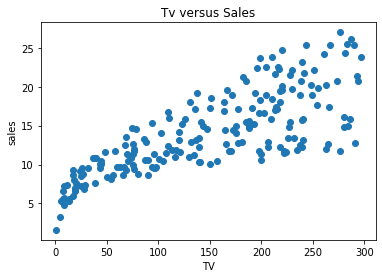

In [10]:
plt.scatter('TV','sales',data=df_new)
plt.xlabel('TV')
plt.ylabel('sales')
plt.title('Tv versus Sales')


Text(0.5, 1.0, 'radio versus Sales')

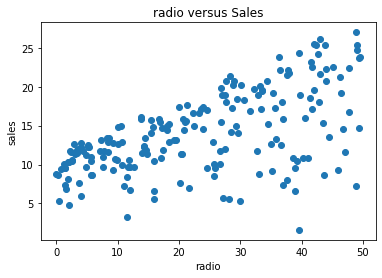

In [11]:
print()
plt.scatter('radio','sales',data=df_new)
plt.xlabel('radio')
plt.ylabel('sales')
plt.title('radio versus Sales')


Text(0.5, 1.0, 'newspaper versus Sales')

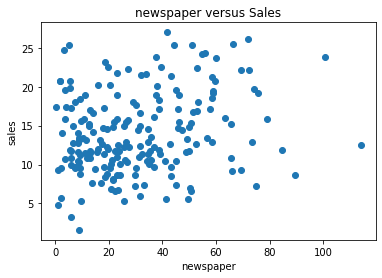

In [12]:
plt.scatter('newspaper','sales',data=df_new)
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.title('newspaper versus Sales')

In [13]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [14]:
lir_model=LinearRegression()
lir_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_lir_pred=lir_model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_lir_pred,y_test)

2.880023730094191

In [17]:
lir_model.fit(X_train_std,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_lir_std_pred=lir_model.predict(X_test_std)

In [19]:
mean_squared_error(y_lir_std_pred,y_test)

2.8800237300941918

In [20]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
lasso=Lasso()

In [21]:
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

In [22]:
ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [23]:
ridge_regressor.best_score_

-3.072671338341144

In [24]:
ridge_regressor.best_params_

{'alpha': 20}

In [28]:
lasso_regressor = GridSearchCV(lasso, parameters,cv=5)

lasso_regressor.fit(X,y)

C:\Users\ELCOT\Documents\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197.21199709791352, tolerance: 0.43829494374999994
  positive)
C:\Users\ELCOT\Documents\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215.57731060968544, tolerance: 0.42183797500000003
  positive)
C:\Users\ELCOT\Documents\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.03911604913193, tolerance: 0.45029244375
  positive)
C:\Users\ELCOT\Documents\New folder\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to i

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
lasso_regressor.best_params_

{'alpha': 1}

In [30]:
lasso_regressor.best_score_

0.8882007416256036